# End-to-End

## 1. Problem (mini project)

Mini Project: FIFA - MoneyBall

Perform an end-to-end analysis putting into practice what you have learned so far. You will apply statistical or machine learning techniques and present your results to the class.



In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

## 2. Getting Data

In [2]:
data = pd.read_csv('fifa21_male2.csv')
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [3]:
data.shape

(17125, 107)

In [4]:
data.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

#### A lot of meanings of the columns can be found in https://sofifa.com/

#### Some abbreviations:
OVA = overall scores
<br>BOV = best overall
<br>POT = potential scores
<br>GK = goalkeeping
<br>W/F = weak foot
<br>SM = skilled moves
<br>IR = international reputation
<br>CF = center forward

## 3. Cleaning/Wrangling/EDA

In [5]:
# standarize name of columns and remove ID column
data.columns = [col_name.lower().replace(' ', '_') for col_name in data.columns]
data = data.drop(data.columns[0], axis=1)
data.head()

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


#### Some more details about the dataset: 

"attacking" = sum ("crossing","finishing","heading_accuracy","short_passing","volleys")
<br>"skill" = sum ("dribbling","curve","fk_accuracy","long_passing","ball_control")
<br>"movement" = sum ("acceleration","sprint_speed","agility","reactions","balance")
<br>"power" = sum ("shot_power","jumping","stamina","strength","long_shots")
<br>"mentality" = sum ("aggression","interceptions","positioning","vision","penalties","composure")
<br>"defending" = sum ("marking","standing_tackle","sliding_tackle")
<br>"goalkeeping" = sum ("gk_diving","gk_handling","gk_kicking","gk_positioning","gk_reflexes")
<br>"total_stats" = sum ("attacking","skill","movement","power","mentality","defending","goalkeeping")
<br>"base_stats" = sum ("pac","sho","pas","dri","def","phy")

In [6]:
# columns to drop
drop_columns = ["position","player_photo","club_logo","flag_photo","team_&_contract","joined","contract",
                "crossing","finishing","heading_accuracy","short_passing","volleys",
                "dribbling","curve","fk_accuracy","long_passing","ball_control",
                "acceleration","sprint_speed","agility","reactions","balance",
                "shot_power","jumping","stamina","strength","long_shots",
                "aggression","interceptions","positioning","vision","penalties","composure",
                "marking","standing_tackle","sliding_tackle",
                "gk_diving","gk_handling","gk_kicking","gk_positioning","gk_reflexes",
                "base_stats","w/f","sm","pac","sho","pas","dri","def","phy","hits",
                "ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm",
                "cm","rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb","gk","gender"]

In [7]:
data = data.drop(drop_columns, axis=1)

In [8]:
# rename the remaining columns with their corresponding meanings
data = data.rename(columns={"ova":"overall_scores",
                        "bov":"best_overall",
                        "pot":"potential_scores",
                        "w/f":"weak_foot",
                        "ir":"international_reputation",
                        "gk":"goalkeeper",
                        "cf":"center_forward",
                        "lde":"loan_date_end",
                        "bp":"better_position", 
                        "sm":"skilled_moves",
                        "a/w":"attacking_work_rate",
                        "d/w":"defensive_work_rate",})
data.head()

,name,age,overall_scores,nationality,club,best_overall,better_position,potential_scores,height,weight,foot,growth,loan_date_end,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,attacking_work_rate,defensive_work_rate,international_reputation
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,69,"6'0""",181lbs,Left,0,NaN,€625K,€7K,€0,313,338,347,347,320,208,56,1929,Medium,High,2 ★
1,Luis García,37,71,Spain,KAS Eupen,70,CM,71,"5'10""",143lbs,Right,0,NaN,€600K,€7K,€1.1M,337,369,305,324,362,153,56,1906,Medium,Medium,1 ★
2,J. Cole,33,71,England,Coventry City,71,CAM,71,"5'9""",161lbs,Right,0,NaN,€1.1M,€15K,€0,337,387,295,284,317,99,51,1770,Medium,Low,2 ★
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,82,"5'11""",165lbs,Right,14,NaN,€0,€0,€0,264,255,176,239,271,75,68,1348,NaN,NaN,1 ★
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,81,"5'7""",150lbs,Right,0,NaN,€5.5M,€12K,€7.2M,367,408,346,297,370,181,45,2014,High,Medium,4 ★


In [9]:
# NAN values
data.isna().sum()

name                            0
age                             0
overall_scores                  0
nationality                     0
club                           23
best_overall                    0
better_position                 0
potential_scores                0
height                          0
weight                          0
foot                            0
growth                          0
loan_date_end               16215
value                           0
wage                            0
release_clause                  0
attacking                       0
skill                           0
movement                        0
power                           0
mentality                       0
defending                       0
goalkeeping                     0
total_stats                     0
attacking_work_rate            89
defensive_work_rate            89
international_reputation        0
dtype: int64

In [10]:
# column `loan_date_end` has a large number of NaN values (16,215) --> drop
data = data.drop(["loan_date_end"], axis=1)

In [11]:
data.isna().sum()

name                         0
age                          0
overall_scores               0
nationality                  0
club                        23
best_overall                 0
better_position              0
potential_scores             0
height                       0
weight                       0
foot                         0
growth                       0
value                        0
wage                         0
release_clause               0
attacking                    0
skill                        0
movement                     0
power                        0
mentality                    0
defending                    0
goalkeeping                  0
total_stats                  0
attacking_work_rate         89
defensive_work_rate         89
international_reputation     0
dtype: int64

In [12]:
# fill NAN with "unknown" in the column club
data["club"] = data["club"].fillna("unknown")
data.shape

(17125, 26)

In [13]:
# drop the remaining NAN values
data = data.dropna(axis=0)
data.shape

(17036, 26)

In [14]:
data.dtypes

name                        object
age                          int64
overall_scores               int64
nationality                 object
club                        object
best_overall                 int64
better_position             object
potential_scores             int64
height                      object
weight                      object
foot                        object
growth                       int64
value                       object
wage                        object
release_clause              object
attacking                    int64
skill                        int64
movement                     int64
power                        int64
mentality                    int64
defending                    int64
goalkeeping                  int64
total_stats                  int64
attacking_work_rate         object
defensive_work_rate         object
international_reputation    object
dtype: object

#### Columns that are objects and should be numerical:
height, weight, value, wage, release_clause, weak_foot, skilled_moves, international_reputation, hits

In [15]:
# height: convert to cm
data["height"].value_counts()

6'0"     2572
5'10"    2406
5'9"     2015
5'11"    1931
6'2"     1860
6'1"     1799
5'8"      955
6'3"      951
5'7"      892
6'4"      714
5'6"      306
6'5"      254
5'5"      184
6'6"      110
5'4"       28
6'7"       27
5'3"       12
6'8"       11
5'2"        5
6'9"        2
5'1"        2
Name: height, dtype: int64

In [16]:
data["height"] = data["height"].str.replace('"','').apply(lambda x: round(int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54))
data["height"].unique()

array([183, 178, 175, 170, 173, 180, 193, 168, 188, 190, 198, 185, 165,
       196, 201, 157, 203, 163, 160, 206, 155], dtype=int64)

In [17]:
# weight: convert to kg
data["weight"] = data["weight"].str.replace('lbs','').apply(lambda x: round(int(x)*0.45359237))
data["weight"].unique()

array([ 82,  65,  73,  68,  74,  72,  71,  76,  75,  95,  91,  70,  79,
        92,  80,  83,  69,  90,  93,  84,  77,  78,  64,  88,  85,  89,
        86,  81,  67,  66, 100,  87, 110,  61,  94,  96,  63, 101, 103,
        99,  60,  58,  62,  97,  59,  57,  98, 107,  56, 102, 104,  55,
        53,  50,  54,  52], dtype=int64)

In [18]:
# value
def clean_value(x):
    x = x.replace("€","")
    if "M" in x:
        x = float(x.replace("M","")) * 1000000
    elif "K" in x:
        x = float(x.replace("K","")) * 1000
    else:
        x = float(x)
    x = int(x)
    return x

data["value"] = list(map(clean_value, data["value"])) 
data["value"].unique()

array([   625000,    600000,   1100000,   5500000,    725000,   2800000,
            1000,    400000,    120000,         0,    500000,    190000,
         2200000,    350000,   1300000,   1500000,    275000,    325000,
          900000,     80000,   3000000,     35000,    975000,    425000,
          850000,     45000,   3200000,   1200000,     50000,    825000,
          130000,   1800000,    575000,   2100000,   1600000,    375000,
         2700000,    550000,   1700000,   3400000,    150000,    300000,
         4200000,   5000000,   1900000,   6500000,    875000,  15500000,
          210000,    450000,   1000000,    775000,   1400000,    100000,
          240000,    650000,    950000,   6000000,   3900000,  46000000,
           30000,   2500000,   4099999,     15000,   7500000,   4300000,
           25000,   9500000,   3100000,     90000,   2400000,    675000,
          475000,   2300000,    925000,   4700000,   4500000,    230000,
         2000000,     70000,   7000000,    170000, 

In [19]:
# wage: same as value
data["wage"] = list(map(clean_value, data["wage"]))
data["wage"].unique()

array([  7000,  15000,  12000,   5000,  44000,  60000,  40000,      0,
        10000,  30000,  45000,   6000,  41000,   3000,  20000,   4000,
         2000,  35000,   8000,  25000, 160000,  80000,   9000,  70000,
       100000,  11000, 220000,  90000,    500,  19000,   1000,  50000,
        49000,  22000,  21000,  33000,    750, 110000,  23000,  16000,
          700,  13000,  17000,  31000,    600,    550,  27000,  14000,
       200000,  28000,  37000,  94000,  32000,  29000,  18000,    650,
        34000,  53000,  47000,  43000,  26000,  36000,  79000,  24000,
       300000,  66000,  62000,  54000,  65000, 560000,    900,  42000,
        57000,  93000,  48000,  51000, 350000,  81000, 125000,  58000,
        39000,  85000,  98000,  38000,  46000,  76000,  84000, 130000,
       115000,  83000, 170000,    800, 260000,  59000,  72000,    950,
        55000,  61000,  56000,  96000, 150000,  63000,  87000,    850,
       140000,  64000, 310000,  89000,  82000, 120000, 105000,  68000,
      

In [20]:
# release_clause: same as value
data["release_clause"] = list(map(clean_value, data["release_clause"]))
data["release_clause"].unique()

array([      0, 1100000, 7200000, ...,  121000,  142000,  367000],
      dtype=int64)

In [21]:
# international_reputation
data["international_reputation"] = data["international_reputation"].str.replace(' ★','').str.strip().astype(int)
data["international_reputation"].unique()

array([2, 1, 4, 3, 5])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17036 entries, 0 to 17124
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      17036 non-null  object
 1   age                       17036 non-null  int64 
 2   overall_scores            17036 non-null  int64 
 3   nationality               17036 non-null  object
 4   club                      17036 non-null  object
 5   best_overall              17036 non-null  int64 
 6   better_position           17036 non-null  object
 7   potential_scores          17036 non-null  int64 
 8   height                    17036 non-null  int64 
 9   weight                    17036 non-null  int64 
 10  foot                      17036 non-null  object
 11  growth                    17036 non-null  int64 
 12  value                     17036 non-null  int64 
 13  wage                      17036 non-null  int64 
 14  release_clause        

In [23]:
data.describe().apply(lambda x: round(x,2))

,age,overall_scores,best_overall,potential_scores,height,weight,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,international_reputation
count,17036.00,17036.00,17036.00,17036.00,17036.00,17036.00,17036.00,1.703600e+04,17036.00,1.703600e+04,17036.00,17036.00,17036.00,17036.00,17036.00,17036.00,17036.00,17036.00,17036.00
mean,25.25,66.95,67.88,72.46,181.14,75.13,5.51,2.580790e+06,10587.95,4.598343e+06,258.62,266.69,323.12,302.60,261.96,141.66,77.53,1632.19,1.15
std,4.92,6.84,6.61,5.74,6.85,7.17,5.79,5.383425e+06,21186.80,1.036013e+07,72.25,76.83,54.56,49.28,62.85,61.55,81.10,259.98,0.45
min,16.00,45.00,44.00,47.00,155.00,50.00,0.00,0.000000e+00,0.00,0.000000e+00,42.00,43.00,113.00,128.00,50.00,20.00,5.00,731.00,1.00
25%,21.00,62.00,64.00,69.00,175.00,70.00,0.00,3.750000e+05,1000.00,5.230000e+05,232.00,232.00,295.00,272.00,235.00,85.00,48.00,1493.00,1.00
50%,25.00,67.00,68.00,72.00,180.00,75.00,4.00,8.000000e+05,3000.00,1.300000e+06,271.00,279.00,332.00,308.00,270.00,158.50,53.00,1660.00,1.00
75%,29.00,72.00,72.00,76.00,185.00,80.00,9.00,2.400000e+06,11000.00,3.900000e+06,306.00,319.00,361.00,339.00,304.00,194.00,59.00,1812.00,1.00
max,53.00,93.00,93.00,95.00,206.00,110.00,26.00,1.055000e+08,560000.00,2.031000e+08,437.00,470.00,464.00,444.00,421.00,272.00,440.00,2316.00,5.00


In [24]:
# check numericals
numerical = data.select_dtypes(np.number)
numerical.head()

,age,overall_scores,best_overall,potential_scores,height,weight,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,international_reputation
0,33,69,71,69,183,82,0,625000,7000,0,313,338,347,347,320,208,56,1929,2
1,37,71,70,71,178,65,0,600000,7000,1100000,337,369,305,324,362,153,56,1906,1
2,33,71,71,71,175,73,0,1100000,15000,0,337,387,295,284,317,99,51,1770,2
4,36,81,82,81,170,68,0,5500000,12000,7200000,367,408,346,297,370,181,45,2014,4
5,27,66,66,70,173,74,4,725000,5000,0,271,276,406,315,256,79,46,1649,2


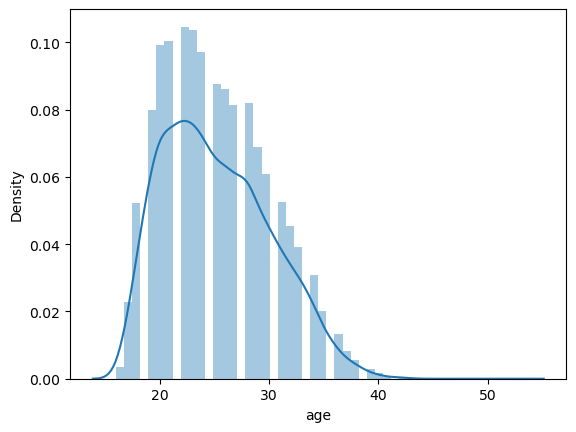

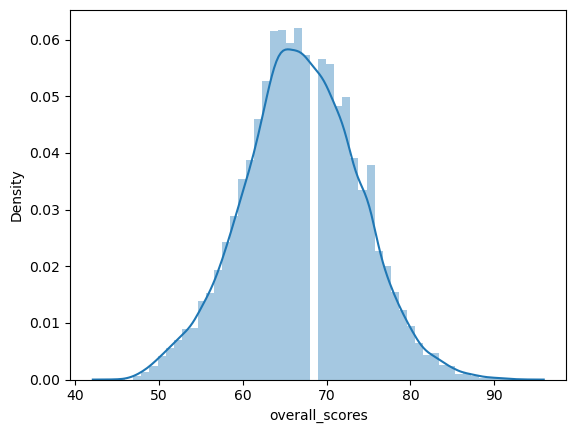

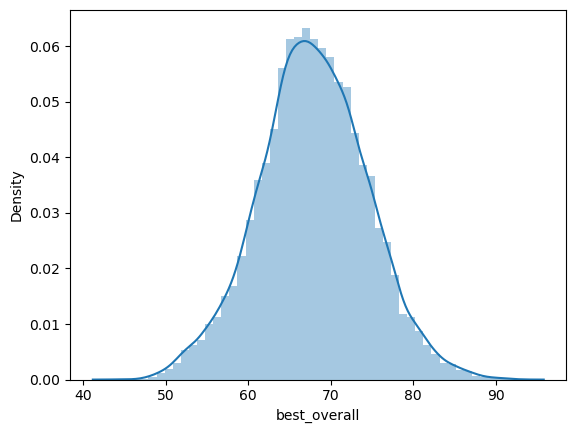

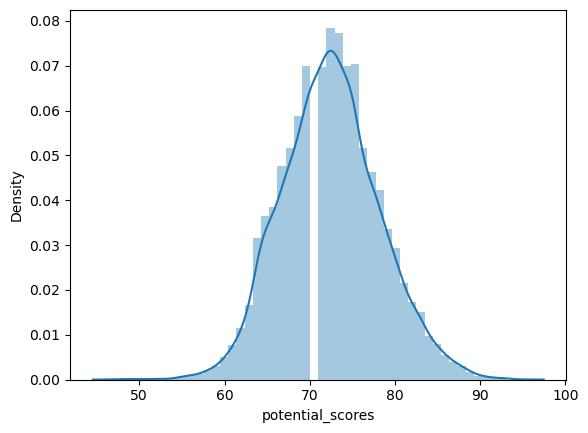

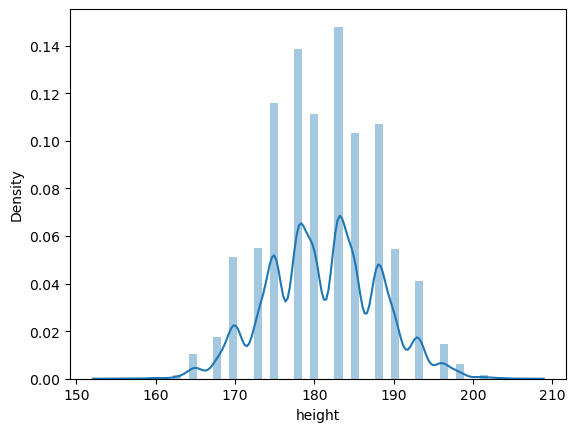

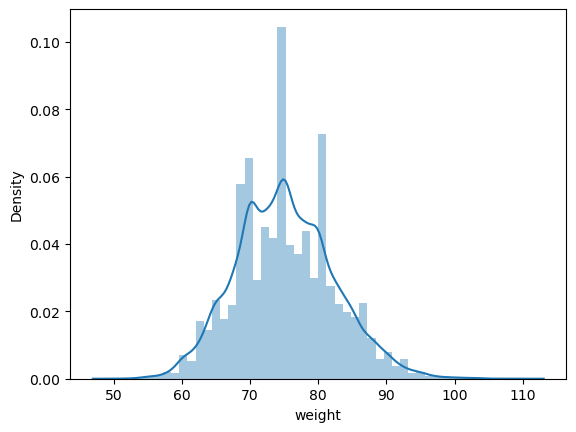

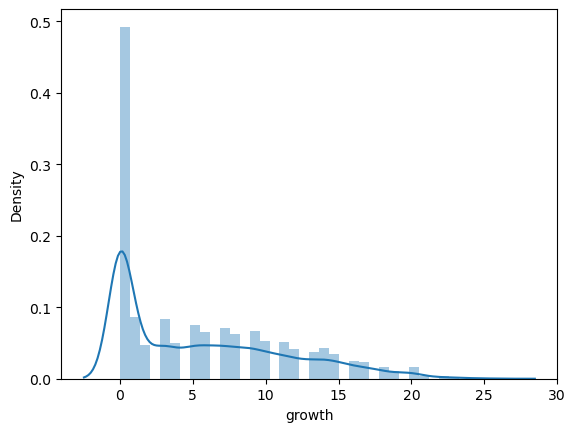

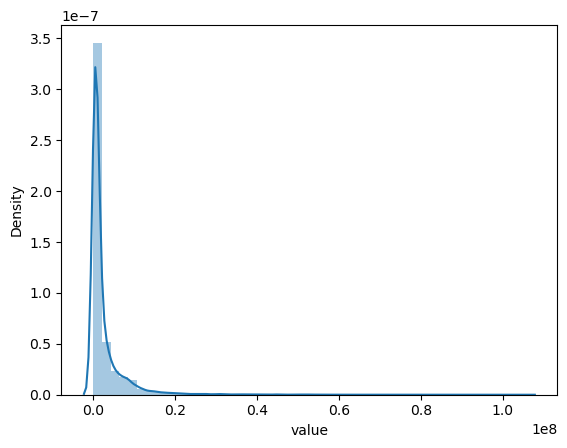

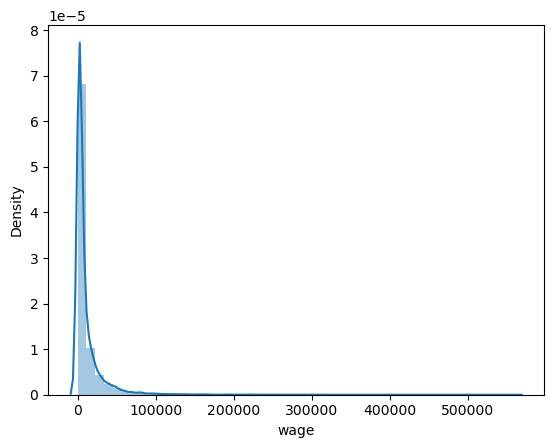

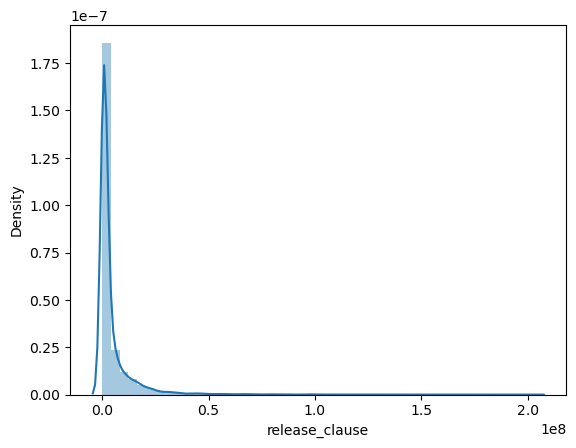

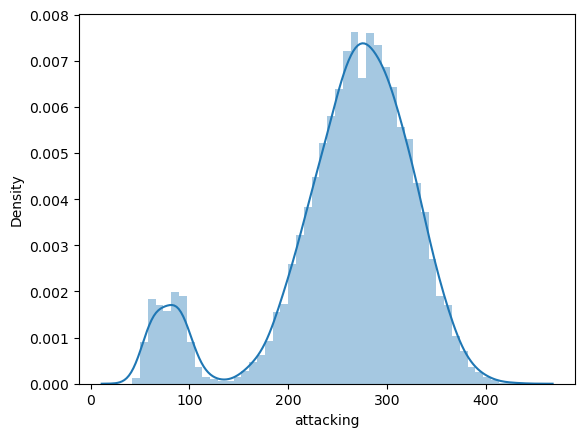

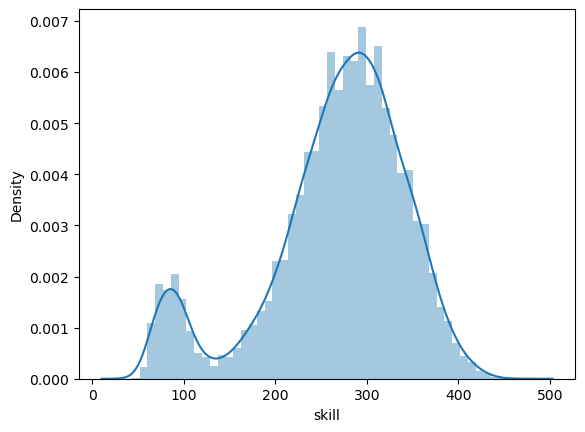

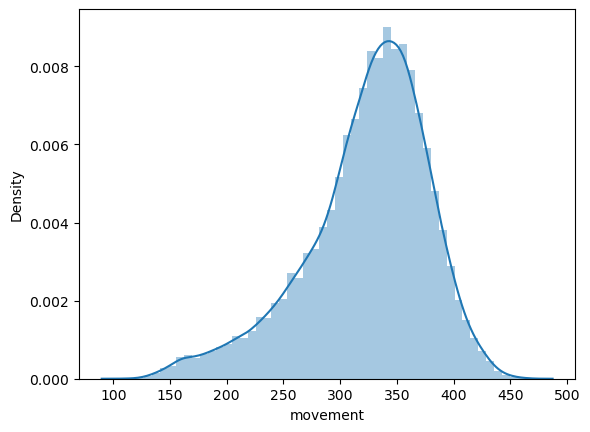

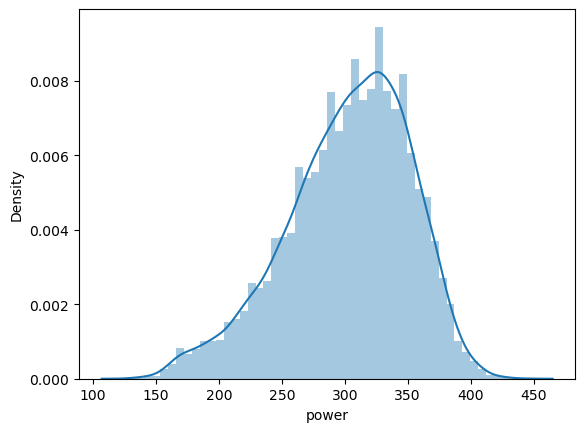

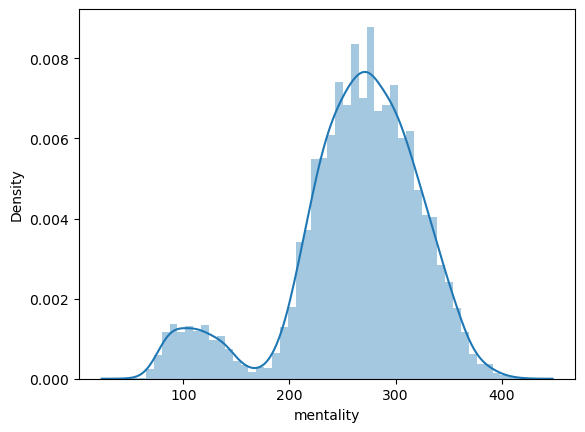

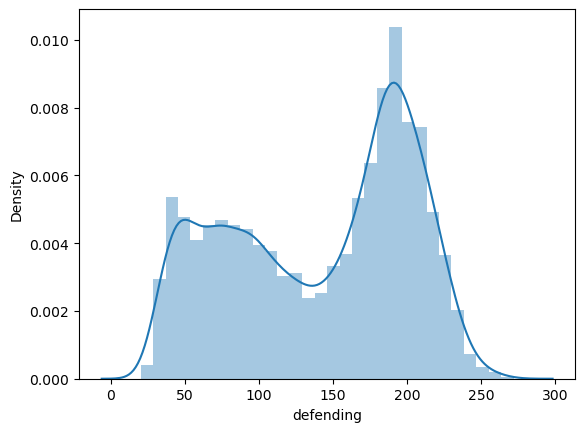

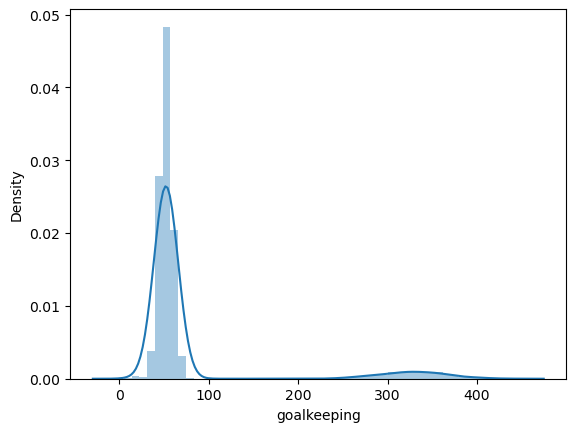

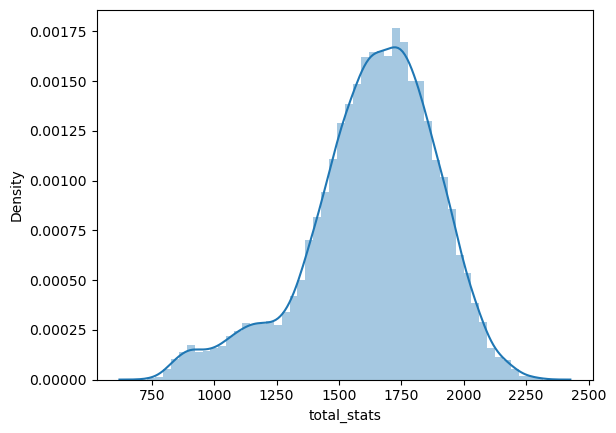

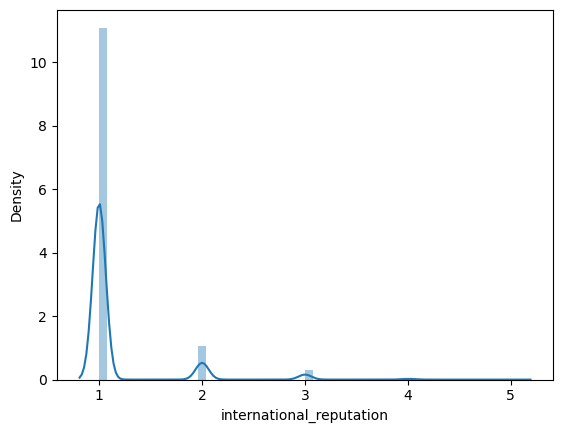

In [25]:
# see distributions
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

## 4. Processing Data

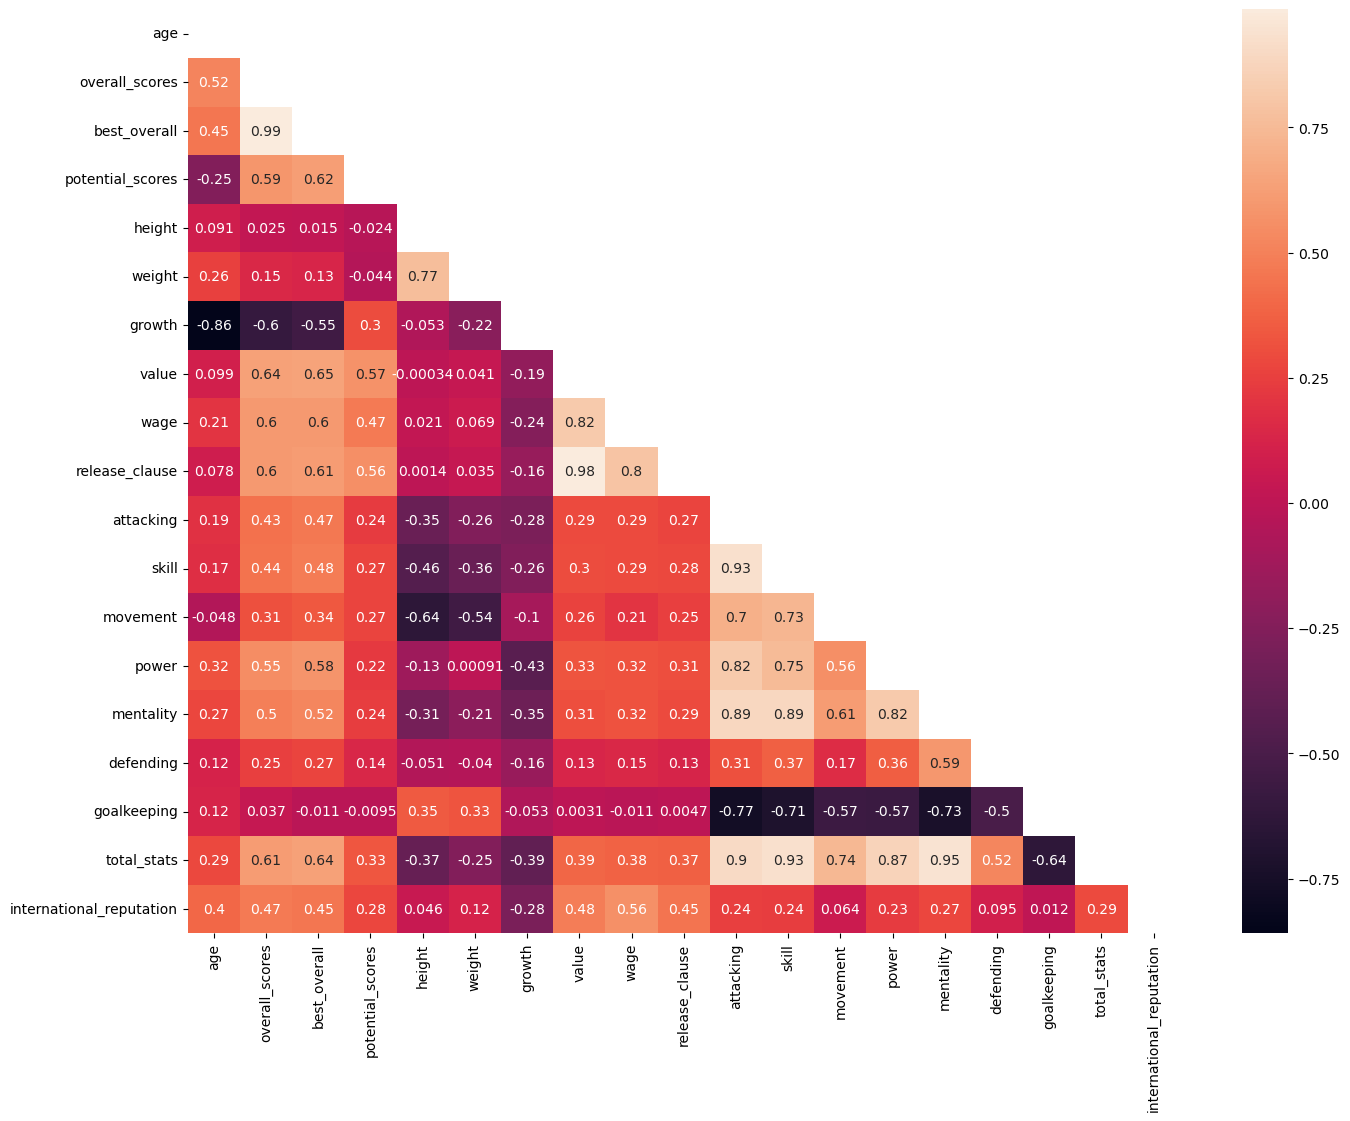

In [26]:
# check correlations
mask = np.zeros_like(numerical.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(numerical.corr(), mask=mask, annot=True)
plt.show()

In [27]:
# drop correlated columns
data = data.drop(["best_overall","release_clause","growth","attacking","skill","movement","power","mentality","defending","goalkeeping"], axis=1)
data.head()

,name,age,overall_scores,nationality,club,better_position,potential_scores,height,weight,foot,value,wage,total_stats,attacking_work_rate,defensive_work_rate,international_reputation
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,183,82,Left,625000,7000,1929,Medium,High,2
1,Luis García,37,71,Spain,KAS Eupen,CM,71,178,65,Right,600000,7000,1906,Medium,Medium,1
2,J. Cole,33,71,England,Coventry City,CAM,71,175,73,Right,1100000,15000,1770,Medium,Low,2
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,170,68,Right,5500000,12000,2014,High,Medium,4
5,D. Odonkor,27,66,Germany,Alemannia Aachen,RW,70,173,74,Right,725000,5000,1649,Medium,Medium,2


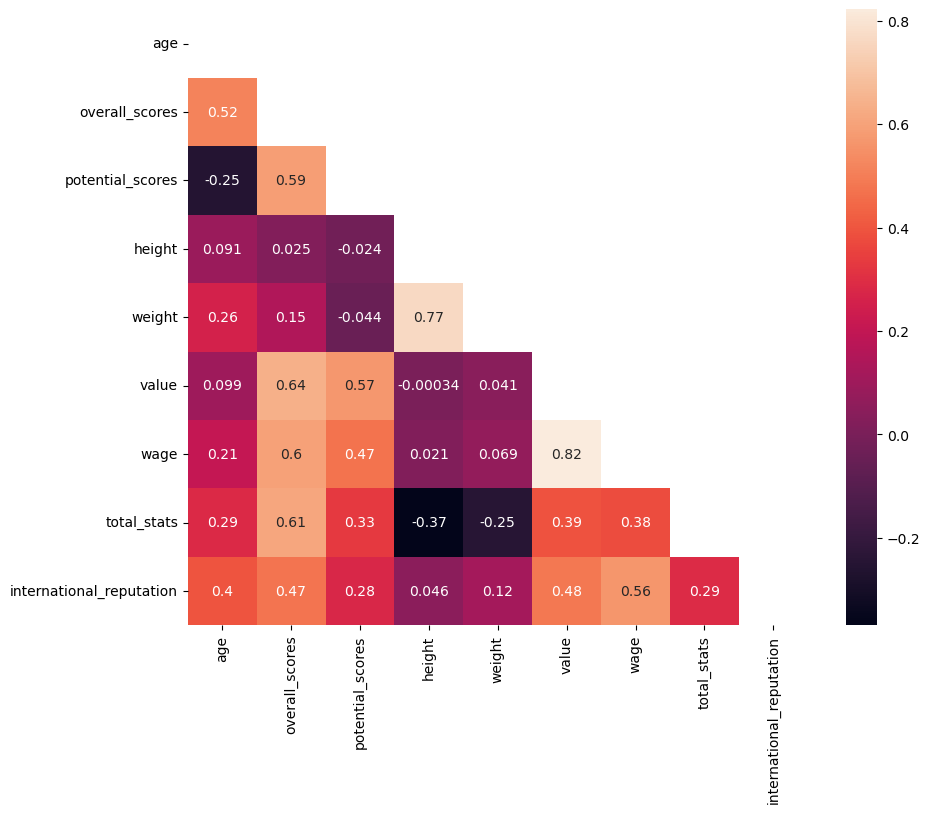

In [28]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

In [29]:
data.describe()

,age,overall_scores,potential_scores,height,weight,value,wage,total_stats,international_reputation
count,17036.000000,17036.000000,17036.000000,17036.000000,17036.000000,1.703600e+04,17036.000000,17036.000000,17036.000000
mean,25.246419,66.948403,72.462785,181.144283,75.129843,2.580790e+06,10587.954919,1632.186781,1.145985
std,4.920975,6.840553,5.736005,6.846934,7.170901,5.383425e+06,21186.796203,259.980265,0.446618
min,16.000000,45.000000,47.000000,155.000000,50.000000,0.000000e+00,0.000000,731.000000,1.000000
25%,21.000000,62.000000,69.000000,175.000000,70.000000,3.750000e+05,1000.000000,1493.000000,1.000000
50%,25.000000,67.000000,72.000000,180.000000,75.000000,8.000000e+05,3000.000000,1660.000000,1.000000
75%,29.000000,72.000000,76.000000,185.000000,80.000000,2.400000e+06,11000.000000,1812.000000,1.000000
max,53.000000,93.000000,95.000000,206.000000,110.000000,1.055000e+08,560000.000000,2316.000000,5.000000


In [30]:
# X-y split
X = data.drop('value', axis=1)
y = data.value
X.shape

(17036, 15)

In [31]:
# get numerical data
X_num = X._get_numeric_data()
X_num.shape

(17036, 8)

In [32]:
# check normality
# sns.pairplot(X_num)

In [33]:
X_num.describe().apply(lambda x: round(x,2))

,age,overall_scores,potential_scores,height,weight,wage,total_stats,international_reputation
count,17036.00,17036.00,17036.00,17036.00,17036.00,17036.00,17036.00,17036.00
mean,25.25,66.95,72.46,181.14,75.13,10587.95,1632.19,1.15
std,4.92,6.84,5.74,6.85,7.17,21186.80,259.98,0.45
min,16.00,45.00,47.00,155.00,50.00,0.00,731.00,1.00
25%,21.00,62.00,69.00,175.00,70.00,1000.00,1493.00,1.00
50%,25.00,67.00,72.00,180.00,75.00,3000.00,1660.00,1.00
75%,29.00,72.00,76.00,185.00,80.00,11000.00,1812.00,1.00
max,53.00,93.00,95.00,206.00,110.00,560000.00,2316.00,5.00


In [34]:
# Normalize (numerical)
X_scaled = StandardScaler().fit_transform(X_num)

def normalize(X):
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_std[X_std==0] = 1.0
    X = (X-X_mean)/X_std
    return X

X_num = normalize(X_num)
X_num.head()

,age,overall_scores,potential_scores,height,weight,wage,total_stats,international_reputation
0,1.575619,0.299917,-0.603693,0.271029,0.958061,-0.169349,1.141676,1.912181
1,2.388466,0.592291,-0.255018,-0.459225,-1.412632,-0.169349,1.053208,-0.326867
2,1.575619,0.592291,-0.255018,-0.897377,-0.297012,0.208245,0.530091,1.912181
4,2.185254,2.054161,1.488356,-1.627631,-0.994274,0.066647,1.468624,6.390278
5,0.356348,-0.138644,-0.429355,-1.189479,-0.157559,-0.263747,0.064671,1.912181


In [35]:
# for column in X_num.columns:
#     sns.distplot(X_num[column])
#     plt.show()

<AxesSubplot:xlabel='wage', ylabel='Density'>

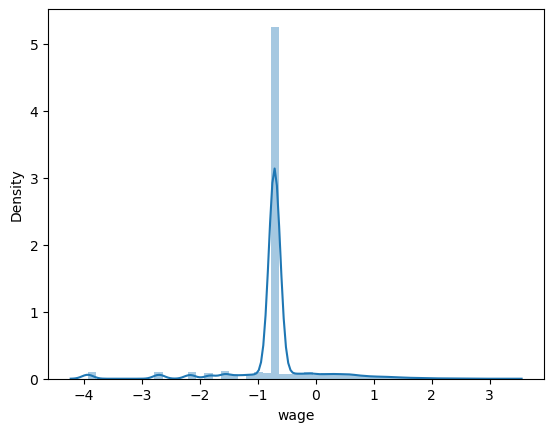

In [36]:
# Log transformation of variable "wage"
X_num_trans = X_num.copy()
def log_tranform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN

X_num_trans['wage'] = list(map(log_tranform_clean, X_num_trans['wage']))
X_num_trans['wage'] = X_num_trans['wage'].fillna(np.mean(X_num_trans['wage']))
sns.distplot(X_num_trans['wage'])

In [37]:
# get categorical data
X_cat = X.select_dtypes(np.object)
X_cat.head()

,name,nationality,club,better_position,foot,attacking_work_rate,defensive_work_rate
0,G. Pasquale,Italy,Udinese,LWB,Left,Medium,High
1,Luis García,Spain,KAS Eupen,CM,Right,Medium,Medium
2,J. Cole,England,Coventry City,CAM,Right,Medium,Low
4,Iniesta,Spain,Vissel Kobe,CAM,Right,High,Medium
5,D. Odonkor,Germany,Alemannia Aachen,RW,Right,Medium,Medium


In [38]:
# name --> drop for maschine learning
X_cat = X_cat.drop("name", axis= 1)

In [39]:
# Nationality
X_cat.nationality.value_counts()

England                     1704
Germany                     1150
Spain                       1120
France                       983
Brazil                       843
Argentina                    775
Italy                        560
Netherlands                  468
Portugal                     358
United States                356
Mexico                       342
Uruguay                      334
Colombia                     304
Japan                        295
Poland                       289
Scotland                     281
Republic of Ireland          278
Belgium                      263
Sweden                       259
Norway                       259
Denmark                      258
Austria                      245
Turkey                       222
Switzerland                  210
Paraguay                     180
Chile                        180
Romania                      166
Korea Republic               155
Australia                    147
Croatia                      141
Senegal   

In [40]:
top_countries = ["England", "Germany", "Spain", "France", "Brazil", "Argentina"]

def clean_nation(x):
    if x not in top_countries:
        x = "Other"
    else: x
    return x

X_cat["nationality"] = list(map(clean_nation, X_cat["nationality"])) 
X_cat["nationality"].value_counts()

Other        10461
England       1704
Germany       1150
Spain         1120
France         983
Brazil         843
Argentina      775
Name: nationality, dtype: int64

In [41]:
# Club
X_cat.club.value_counts()

Bolton Wanderers                       45
Chelsea                                44
Aston Villa                            43
Wolverhampton Wanderers                43
AS Monaco                              43
Everton                                43
Arsenal                                43
Crystal Palace                         42
Tottenham Hotspur                      42
Manchester United                      42
Sunderland                             42
Sparta Praha                           42
Genoa                                  41
Fulham                                 41
FC Barcelona                           40
Lazio                                  40
West Ham United                        40
Liverpool                              40
Leicester City                         40
Inter                                  40
Atalanta                               39
Newcastle United                       39
Sporting CP                            39
Real Sociedad                     

In [42]:
X_cat = X_cat.drop("club", axis= 1)

In [43]:
# Position
X_cat.better_position.value_counts()

CB     3234
ST     2639
CAM    2240
GK     1567
RM     1400
CDM    1243
CM      986
LB      920
RB      893
LM      803
RW      326
LWB     252
RWB     251
LW      208
CF       74
Name: better_position, dtype: int64

In [44]:
defense_positions = ["CB", "RB", "LB", "LWB", "RWB"]
midfield_positions = ["CDM", "CM", "RM", "LM", "CAM"]
attack_positions = ["LW", "RW", "CF", "ST"]

def clean_position(x):
    if x in defense_positions:
        x = "Defense"
    elif x in midfield_positions:
        x = "Midfield"
    elif x in attack_positions:
        x = "Attack"
    elif x == "GK":
        x = "Goalkeeper"
    return x

X_cat["better_position"] = list(map(clean_position, X_cat["better_position"])) 
X_cat["better_position"].value_counts()

Midfield      6672
Defense       5550
Attack        3247
Goalkeeper    1567
Name: better_position, dtype: int64

In [45]:
# attacking_work_rate, defensive_work_rate
X_cat = X_cat.drop("attacking_work_rate", axis= 1)
X_cat = X_cat.drop("defensive_work_rate", axis= 1)

In [46]:
X_cat.head()

,nationality,better_position,foot
0,Other,Defense,Left
1,Spain,Midfield,Right
2,England,Midfield,Right
4,Spain,Midfield,Right
5,Germany,Attack,Right


In [47]:
# apply get dummies to X_cat
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat.head()

,nationality_Brazil,nationality_England,nationality_France,nationality_Germany,nationality_Other,nationality_Spain,better_position_Defense,better_position_Goalkeeper,better_position_Midfield,foot_Right
0,0,0,0,0,1,0,1,0,0,0
1,0,0,0,0,0,1,0,0,1,1
2,0,1,0,0,0,0,0,0,1,1
4,0,0,0,0,0,1,0,0,1,1
5,0,0,0,1,0,0,0,0,0,1


In [48]:
# Concat DataFrames 
X = pd.concat([X_num, X_cat], axis=1)
X.head()

,age,overall_scores,potential_scores,height,weight,wage,total_stats,international_reputation,nationality_Brazil,nationality_England,nationality_France,nationality_Germany,nationality_Other,nationality_Spain,better_position_Defense,better_position_Goalkeeper,better_position_Midfield,foot_Right
0,1.575619,0.299917,-0.603693,0.271029,0.958061,-0.169349,1.141676,1.912181,0,0,0,0,1,0,1,0,0,0
1,2.388466,0.592291,-0.255018,-0.459225,-1.412632,-0.169349,1.053208,-0.326867,0,0,0,0,0,1,0,0,1,1
2,1.575619,0.592291,-0.255018,-0.897377,-0.297012,0.208245,0.530091,1.912181,0,1,0,0,0,0,0,0,1,1
4,2.185254,2.054161,1.488356,-1.627631,-0.994274,0.066647,1.468624,6.390278,0,0,0,0,0,1,0,0,1,1
5,0.356348,-0.138644,-0.429355,-1.189479,-0.157559,-0.263747,0.064671,1.912181,0,0,0,1,0,0,0,0,0,1


## 5. Modeling

### Linear Regression

In [49]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# apply linear regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)

In [51]:
# predict on test data
y_pred_linreg

array([ 3186241.37002498,  1492619.31816934,  7878862.6471146 , ...,
        1926284.59472999,  3156343.33818944, 19343997.84204999])

## 6. Model Validation

In [52]:
r2 = r2_score(y_test, y_pred_linreg)
MSE = mean_squared_error(y_test, y_pred_linreg)
RMSE = mean_squared_error(y_test, y_pred_linreg, squared=False)
MAE = mean_absolute_error(y_test, y_pred_linreg)
print("r2 =", r2)
print("MSE =", MSE)
print("RMSE =", RMSE)
print("MAE =", MAE)

r2 = 0.7400576112680226
MSE = 7626477427237.125
RMSE = 2761607.761293614
MAE = 1444994.4903948116


In [53]:
# Try remove outliers

def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column], 75)
            lower = np.percentile(data[column], 25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            print(f"{column}: lower limit = {lower_limit}, upper limit = {upper_limit}")
            data = data[(data[column] > lower_limit) & (data[column] < upper_limit)]
    return data

data1 = data.copy()
data1 = remove_outliers(data1, threshold=1.5, skip_columns=['international_reputation','value'])
data1.head()

age: lower limit = 9.0, upper limit = 41.0
overall_scores: lower limit = 47.0, upper limit = 87.0
potential_scores: lower limit = 58.5, upper limit = 86.5
height: lower limit = 160.0, upper limit = 200.0
weight: lower limit = 55.0, upper limit = 95.0
wage: lower limit = -12500.0, upper limit = 23500.0
total_stats: lower limit = 1041.5, upper limit = 2213.5


,name,age,overall_scores,nationality,club,better_position,potential_scores,height,weight,foot,value,wage,total_stats,attacking_work_rate,defensive_work_rate,international_reputation
0,G. Pasquale,33,69,Italy,Udinese,LWB,69,183,82,Left,625000,7000,1929,Medium,High,2
1,Luis García,37,71,Spain,KAS Eupen,CM,71,178,65,Right,600000,7000,1906,Medium,Medium,1
2,J. Cole,33,71,England,Coventry City,CAM,71,175,73,Right,1100000,15000,1770,Medium,Low,2
4,Iniesta,36,81,Spain,Vissel Kobe,CAM,81,170,68,Right,5500000,12000,2014,High,Medium,4
5,D. Odonkor,27,66,Germany,Alemannia Aachen,RW,70,173,74,Right,725000,5000,1649,Medium,Medium,2


In [55]:
X = data1.drop('value', axis=1)
y = data1.value

X_num = X._get_numeric_data()

X_scaled = StandardScaler().fit_transform(X_num)
def normalize(X):
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_std[X_std==0] = 1.0
    X = (X-X_mean)/X_std
    return X
X_num = normalize(X_num)

X_cat = X.select_dtypes(np.object)
X_cat = X_cat.drop("name", axis= 1)

top_countries = ["England", "Germany", "Spain", "France", "Brazil", "Argentina"]
def clean_nation(x):
    if x not in top_countries:
        x = "Other"
    else: x
    return x
X_cat["nationality"] = list(map(clean_nation, X_cat["nationality"])) 

X_cat = X_cat.drop("club", axis= 1)

defense_positions = ["CB", "RB", "LB", "LWB", "RWB"]
midfield_positions = ["CDM", "CM", "RM", "LM", "CAM"]
attack_positions = ["LW", "RW", "CF", "ST"]
def clean_position(x):
    if x in defense_positions:
        x = "Defense"
    elif x in midfield_positions:
        x = "Midfield"
    elif x in attack_positions:
        x = "Attack"
    elif x == "GK":
        x = "Goalkeeper"
    return x
X_cat["better_position"] = list(map(clean_position, X_cat["better_position"])) 

X_cat = X_cat.drop("attacking_work_rate", axis= 1)
X_cat = X_cat.drop("defensive_work_rate", axis= 1)

X_cat = pd.get_dummies(X_cat, drop_first=True)

X = pd.concat([X_num, X_cat], axis=1)
X.head()

,age,overall_scores,potential_scores,height,weight,wage,total_stats,international_reputation,nationality_Brazil,nationality_England,nationality_France,nationality_Germany,nationality_Other,nationality_Spain,better_position_Defense,better_position_Goalkeeper,better_position_Midfield,foot_Right
0,1.648196,0.543827,-0.532174,0.345648,1.083099,0.346831,1.431468,3.023683,0,0,0,0,1,0,1,0,0,0
1,2.470170,0.889452,-0.136475,-0.414726,-1.419621,0.346831,1.321726,-0.249202,0,0,0,0,0,1,0,0,1,1
2,1.648196,0.889452,-0.136475,-0.870950,-0.241871,1.822058,0.672820,3.023683,0,1,0,0,0,0,0,0,1,1
4,2.264676,2.617576,1.842022,-1.631323,-0.977965,1.268848,1.837034,9.569452,0,0,0,0,0,1,0,0,1,1
5,0.415236,0.025390,-0.334324,-1.175099,-0.094652,-0.021976,0.095484,3.023683,0,0,0,1,0,0,0,0,0,1


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)

y_pred_linreg

r2 = r2_score(y_test, y_pred_linreg)
MSE = mean_squared_error(y_test, y_pred_linreg)
RMSE = mean_squared_error(y_test, y_pred_linreg, squared=False)
MAE = mean_absolute_error(y_test, y_pred_linreg)
print("r2 =", r2)
print("MSE =", MSE)
print("RMSE =", RMSE)
print("MAE =", MAE)

r2 = 0.5925357125483972
MSE = 1722001670183.2659
RMSE = 1312250.6125673044
MAE = 824651.5765450366


In [57]:
data1.describe()

,age,overall_scores,potential_scores,height,weight,value,wage,total_stats,international_reputation
count,14171.000000,14171.00000,14171.000000,14171.000000,14171.000000,1.417100e+04,14171.000000,14171.000000,14171.000000
mean,24.979324,65.85308,71.689789,180.727119,74.642933,1.451436e+06,5119.172959,1628.988074,1.076141
std,4.866336,5.78662,5.054343,6.575718,6.792609,2.069097e+06,5422.892552,209.583414,0.305541
min,16.000000,48.00000,59.000000,163.000000,56.000000,0.000000e+00,0.000000,1042.000000,1.000000
25%,21.000000,62.00000,68.000000,175.000000,70.000000,3.500000e+05,1000.000000,1500.000000,1.000000
50%,24.000000,66.00000,72.000000,180.000000,75.000000,7.250000e+05,3000.000000,1645.000000,1.000000
75%,28.000000,70.00000,75.000000,185.000000,79.000000,1.500000e+06,7000.000000,1779.000000,1.000000
max,40.000000,83.00000,86.000000,198.000000,94.000000,2.700000e+07,23000.000000,2201.000000,4.000000


## 7. Reporting